In [2]:
import requests

languages = ['python',
             'javascript',
             'ruby',
             'c',
             'java',
             'perl',
             'haskell',
             'go']


def get_contributors_num(contributors_dict):
    """
    (dict) -> dict

    Returns a new dict, with the repos names as keys
    and the number of contributors as values.
    """
    num_contributors = {}
    
    for k, v in contributors_dict.items():
        url = v + '?page=1&per_page=1000'
        r = requests.get(url)
        
        response_dict = r.json()
        num_contributors[k] = len(response_dict)
    
    return num_contributors


# Make an API call for each language and store the responses.
repos_names = {}
repos_info = {}
num_contributors = {}

for language in languages:
    url = 'https://api.github.com/search/repositories?q=language:{}&sort=stars'
    url = url.format(language)
    r = requests.get(url)
    response_dict = r.json()
    # Create a list to hold the info from the 30 most starred repos. 
    repo_dicts = response_dict['items']
    
    # Extract info for the graphs.
    names, plot_dicts = [], []
    contributors_urls = {}
    for repo_dict in repo_dicts:
        
        names.append(repo_dict['name'])
        
        plot_dict = {
            'value': repo_dict['stargazers_count'],
            'label': repo_dict['description'] or '',
            'xlink': repo_dict['html_url'],
            }
        plot_dicts.append(plot_dict)
        
        contributors_urls[repo_dict['name']] = repo_dict['contributors_url']
    
    repos_names[language] = names
    repos_info[language] = plot_dicts
    # Make an API call to get the number of contributors
    num_contributors[language] = get_contributors_num(contributors_urls)






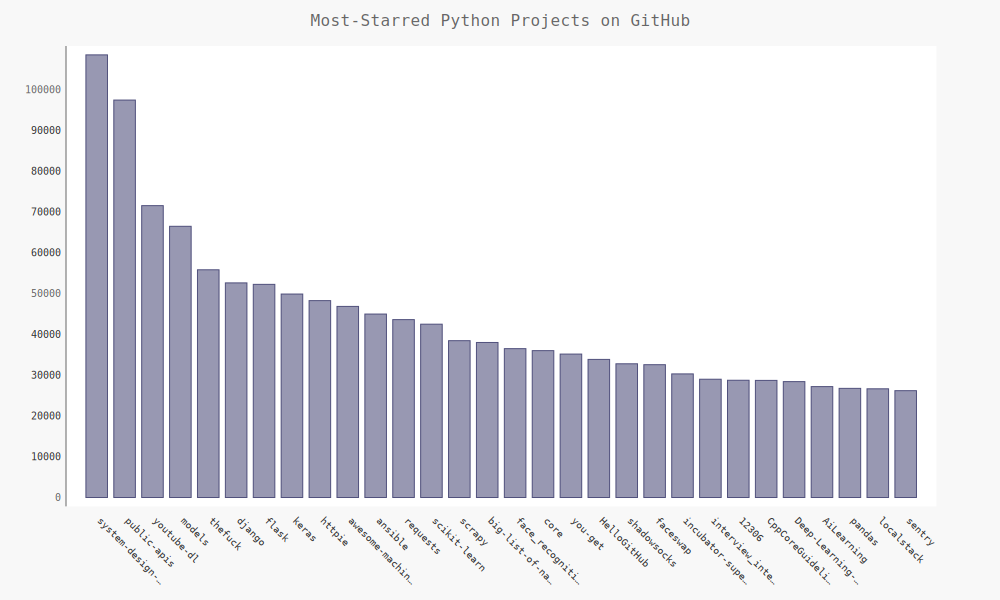

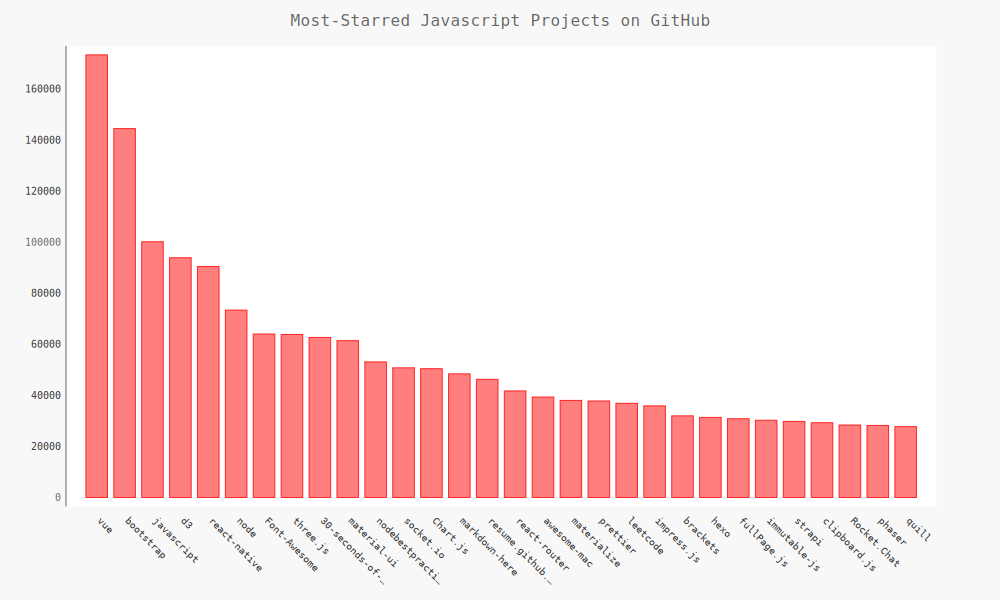

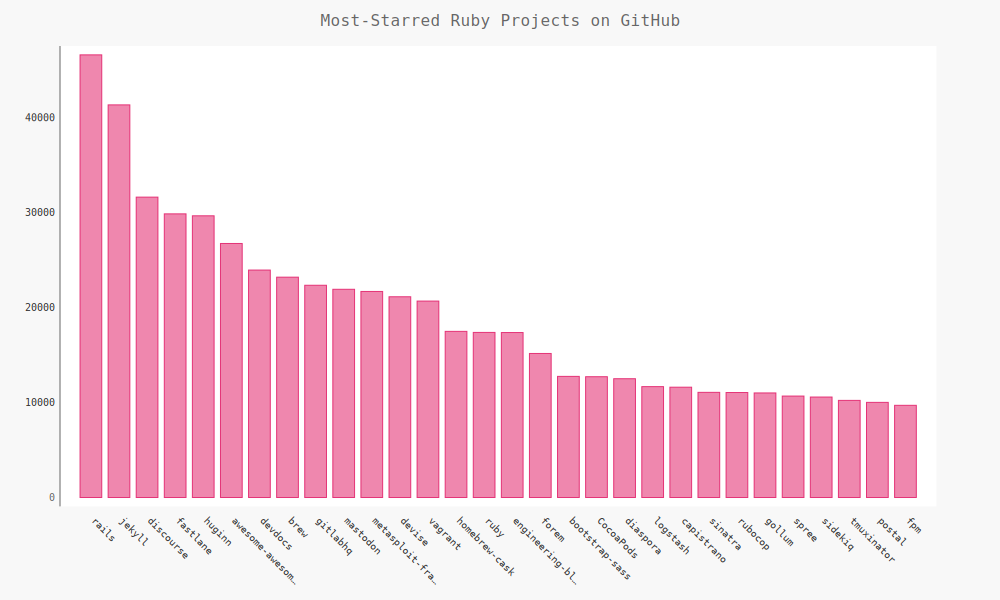

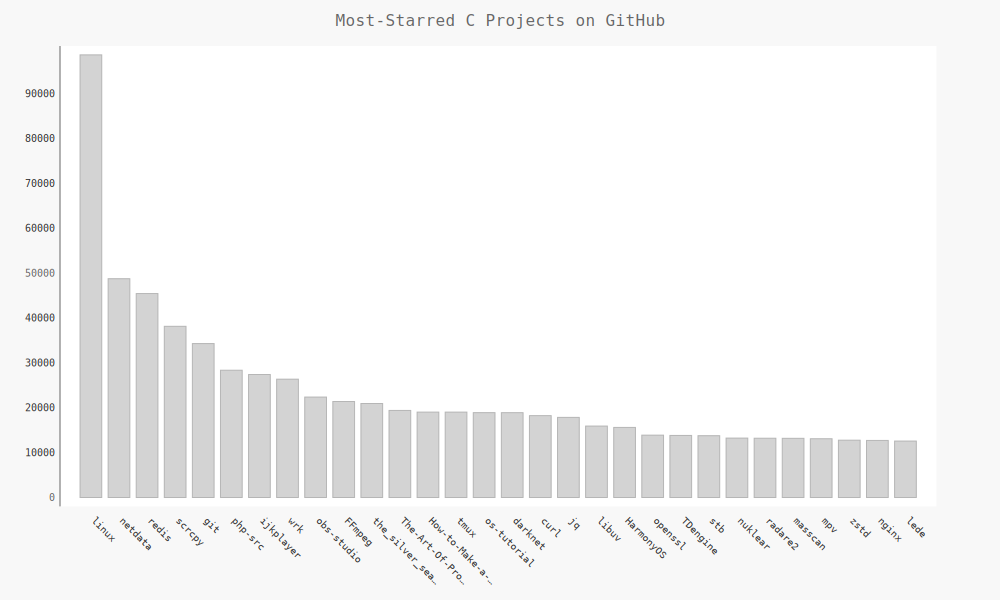

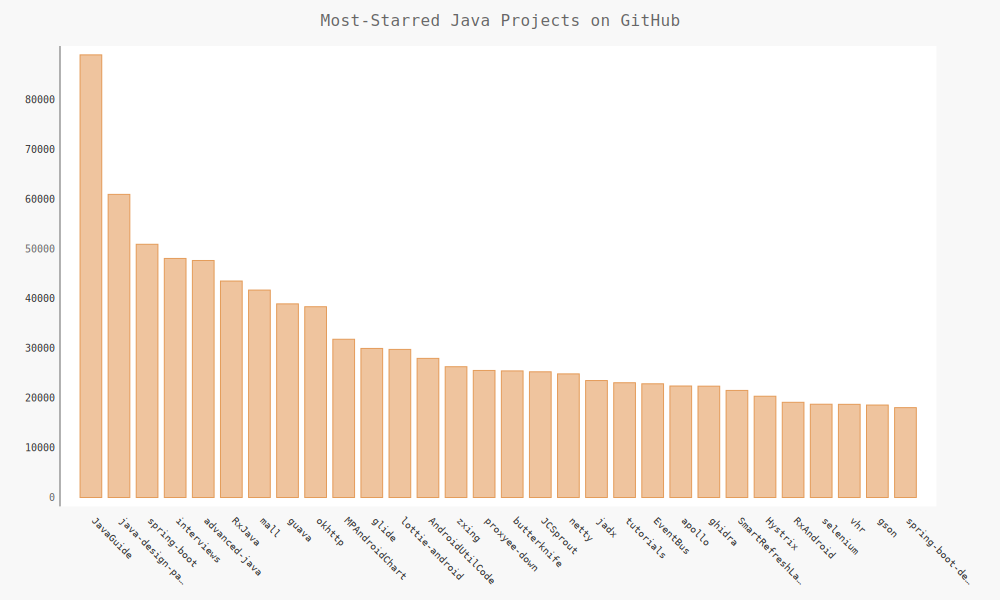

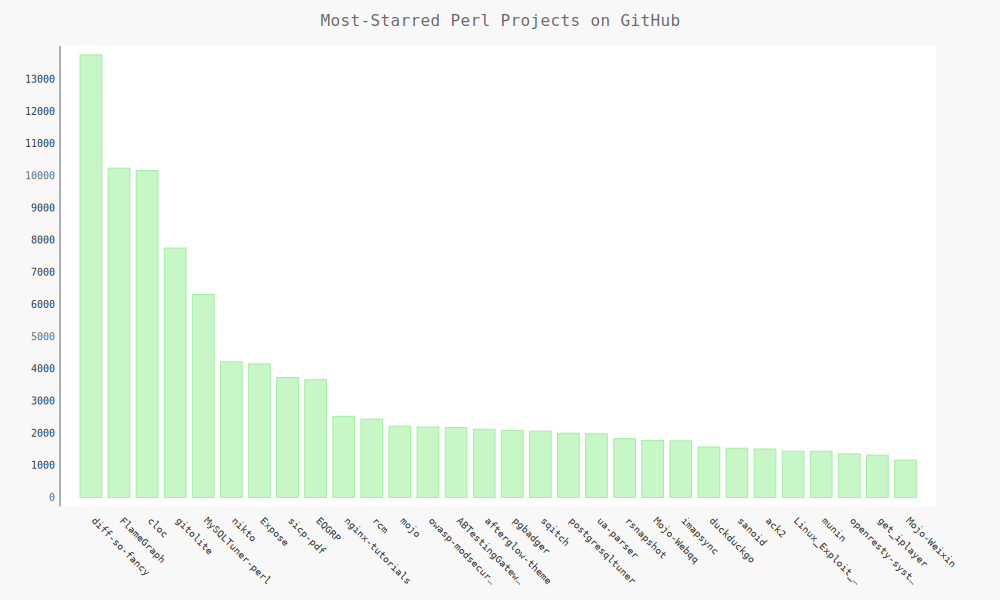

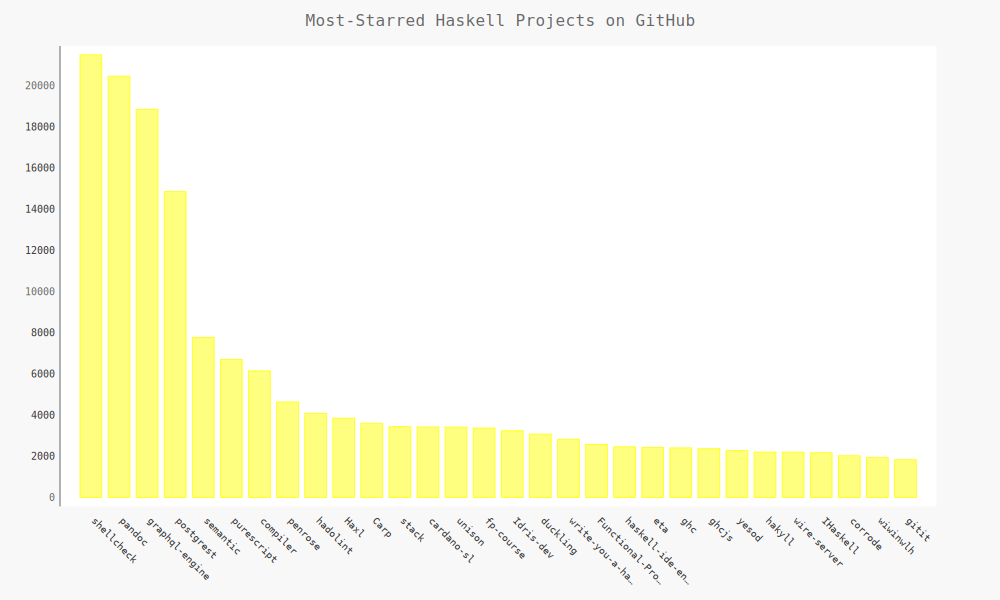

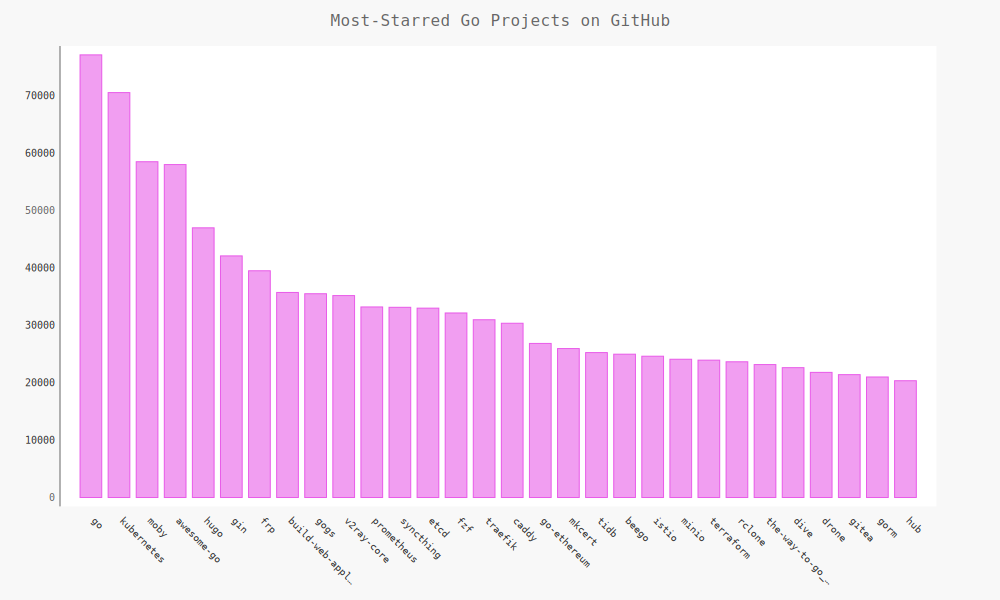

In [3]:
import pygal
from pygal.style import LightColorizedStyle as LCS, LightenStyle as LS
from IPython.display import SVG, display

# Make visualization.



colors = ['#333366',
          '#ff0000',
          '#e0115f',
          '#a9a9a9',
          '#e08b3e',
          '#90ee90',
          '#ffff00',
          '#e53fe5']

my_config = pygal.Config()
my_config.x_label_rotation = 45
my_config.show_legend = False
my_config.title_font_size = 24
my_config.label_font_size = 14
my_config.major_label_font_size = 18
my_config.truncate_label = 15
my_config.show_y_guides = False
my_config.width = 1000
    

for language in languages:
    my_style = LS('{}'.format(colors[languages.index(language)]), base_style=LCS)
    chart = pygal.Bar(my_config, style=my_style)
    chart.title = 'Most-Starred {} Projects on GitHub'.format(language.capitalize())
    chart.x_labels = repos_names[language]
    
    chart.add('', repos_info[language])
    #chart.render_to_file('{}_repos.svg'.format(language))
    display(SVG(chart.render(disable_xml_declaration=True)))


So far, it seems I cannot get it to work, that is, pygal graphs are not displayed on Jupyter Notebook or they are no longer interactive... __WIP__  